<a href="https://colab.research.google.com/github/shailza969/Titanic-Survival-Project/blob/main/Ensemble%20And%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("/content/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
l1 = ['PassengerId', 'Cabin', 'Ticket']
df.drop(l1, axis = 1, inplace = True)

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [8]:
temp = df['Name'].unique()

In [9]:
temp[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [10]:
st= []
for i in temp:
  a = i.split()
  for k in a:
    if '.' in k:
      st.append(k)
      break


In [11]:
st[:10]

['Mr.',
 'Mrs.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mrs.']

In [12]:
st = np.array(st)

In [13]:
st[:10]

array(['Mr.', 'Mrs.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Master.',
       'Mrs.', 'Mrs.'], dtype='<U9')

In [14]:
df["Name_front"] = st

In [15]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_front
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         714 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    889 non-null    object 
 9   Name_front  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [17]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Embarked'].fillna(str(df['Embarked'].mode), inplace = True)

In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Name_front    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    891 non-null    object 
 9   Name_front  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [20]:
df.drop('Name', axis = 1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Name_front  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le_s = LabelEncoder()
le_e = LabelEncoder()
le_n = LabelEncoder()
df['Sex'] = le_s.fit_transform(df['Sex'])
df['Embarked'] = le_e.fit_transform(df['Embarked'])
df['Name_front'] = le_n.fit_transform(df['Name_front'])

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_front
0,0,3,1,22.0,1,0,7.2500,3,12
1,1,1,0,38.0,1,0,71.2833,1,13
2,1,3,0,26.0,0,0,7.9250,3,9
3,1,1,0,35.0,1,0,53.1000,3,13
4,0,3,1,35.0,0,0,8.0500,3,12


In [24]:
X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test= train_test_split(X, y, test_size = 0.2)

In [26]:
X_test.shape, y_test.shape

((179, 8), (179,))

In [34]:
from sklearn.ensemble import RandomForestClassifier


In [35]:
clf = RandomForestClassifier(n_estimators= 50, n_jobs = -1, max_depth = 2)

In [36]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

# Overfitting case when max_depth isn't mentioned and estimators are 10

In [32]:
clf.score(X_train, y_train)

0.9719101123595506

In [33]:
clf.score(X_test, y_test)

0.8491620111731844

# a General model

In [ ]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.797752808988764
0.8044692737430168


# BOOSTING

### Adaboost Classifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
clf1 = AdaBoostClassifier()

In [ ]:
clf1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

# n_estimators = 50, learning rate = 1

In [ ]:
clf1.score(X_train, y_train)

0.8370786516853933

In [ ]:
clf1.score(X_test, y_test)

0.8547486033519553

In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[101,   8],
       [ 18,  52]])

#XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf2 = XGBClassifier()


In [ ]:
clf2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred2= clf2.predict(X_test)

In [ ]:
clf2.score(X_train, y_train)

0.8834269662921348

In [ ]:
clf2.score(X_test, y_test)

0.8715083798882681

In [ ]:
confusion_matrix(y_pred2, y_test)

array([[110,  14],
       [  9,  46]])

In [ ]:
# Better estimation than adaboost

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       124
           1       0.77      0.84      0.80        55

    accuracy                           0.87       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.88      0.87      0.87       179



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf2, X_train, y_train, cv=5, n_jobs =-1).mean()

0.803398010440264

## Hyper parameters tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
    'learning_rate':[0.1,.01, 0.3, 0.6, 0.5],
    'max_depth' : [1,2,3,4,5],
    'n_estimators' :[5,10, 15, 20, 50,100],
    'gamma' :[0.1, 0.01, 0, 0.001]
}

In [ ]:
clf2_grid = GridSearchCV(estimator=clf2, param_grid=param, cv = 5, n_jobs = -1)

In [ ]:
clf2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.01, 0, 0.001],
                         'learning_rate': [0.1, 0.01, 0.3, 0.6, 0.5],
                         'max_depth': [1, 2, 3, 4, 5

In [ ]:
clf2_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf2_grid.best_params_

{'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
clf2_grid.best_score_

0.8188220230473753

# NN

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [38]:
clf3 = Sequential()

In [39]:
X_train.shape, y_train.shape

((712, 8), (712,))

In [40]:
clf3.add(Dense(32, activation = 'relu', input_shape= (8,)))


In [41]:
clf3.add(Dense(32, activation = 'relu'))

In [42]:
clf3.add(Dense(1, activation = 'sigmoid'))

In [43]:
clf3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
clf3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [45]:
clf3.fit(X_train, y_train, batch_size=32, epochs=100, validation_split = 0.1 )

Epoch 1/100
20/20 [==============================] - 16s 30ms/step - loss: 2.0567 - accuracy: 0.3883 - val_loss: 0.9777 - val_accuracy: 0.6111
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9565 - accuracy: 0.6471 - val_loss: 0.7207 - val_accuracy: 0.6389
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6737 - val_loss: 0.7159 - val_accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6596 - val_loss: 0.6313 - val_accuracy: 0.6111
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.6683 - val_loss: 0.5987 - val_accuracy: 0.6944
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.6922 - val_loss: 0.5891 - val_accuracy: 0.7222
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7097 - val_loss: 0.5788 - val_accuracy: 0.7222
Epoch 8/100

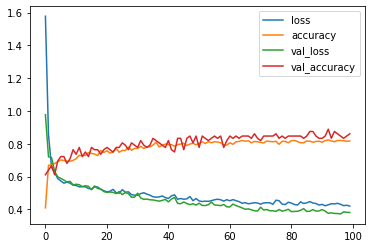

In [46]:
pd.DataFrame(clf3.history.history).plot()

In [47]:
clf3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.4389 - accuracy: 0.8212


[0.43891143798828125, 0.8212290406227112]

In [51]:
y_pred = clf3.predict(X_test)

In [53]:
y_pred = y_pred>=0.5

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[98, 22],
       [10, 49]])